In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

In [13]:
model_db = pd.read_csv('model_annotations_liwc.csv', sep=';')
print(model_db.shape)
model_db.head(5)

(12678, 122)


,text,proc_text,model_unanimous,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,"Dear World:family_man_woman_girl_boy:, you nee...","Dear World:family_man_woman_girl_boy:, you nee...",PO,1,32,52.84,75.49,1.63,1.00,16.0,...,0.0,0.0,59.38,3.13,6.25,0.0,0.0,0.00,50.00,12.5
1,.@fordnation says releasing the projection mod...,.@fordnation says releasing the projection mod...,PO,1,28,96.35,3.12,48.09,1.00,28.0,...,0.0,0.0,32.14,3.57,3.57,0.0,0.0,3.57,21.43,0.0
2,"""Neurologists around the world say that a smal...","""Neurologists around the world say that a smal...",UN,1,34,93.03,24.36,4.60,20.23,17.0,...,0.0,0.0,20.59,2.94,0.00,0.0,0.0,2.94,14.71,0.0
3,Coronavirus: More than one million cases confi...,Coronavirus: More than one million cases confi...,UN,1,34,93.03,40.06,12.44,1.85,17.0,...,0.0,0.0,14.71,5.88,0.00,0.0,0.0,0.00,8.82,0.0
4,"This is my Gov, @henrymcmaster, today, 4/2/202...","This is my Gov, @henrymcmaster, today, 4/2/202...",UN,1,42,81.45,54.27,72.58,3.20,10.5,...,0.0,0.0,38.10,7.14,11.90,0.0,0.0,2.38,16.67,0.0


In [14]:
# check presence of not answered value both on train and test set
print('train_df datatypes:')
print(model_db.dtypes)
total_null_values = model_db.isnull().sum().sum()
null_values_per_column = model_db.isnull().sum()
print('')
print('')
print(f"Total null values in the DataFrame: {total_null_values}")
print("\nNull values per column:")
print(null_values_per_column)

train_df datatypes:
text                object
proc_text           object
model_unanimous     object
Segment              int64
WC                   int64
                    ...   
QMark              float64
Exclam             float64
Apostro            float64
OtherP             float64
Emoji              float64
Length: 122, dtype: object


Total null values in the DataFrame: 0

Null values per column:
text               0
proc_text          0
model_unanimous    0
Segment            0
WC                 0
                  ..
QMark              0
Exclam             0
Apostro            0
OtherP             0
Emoji              0
Length: 122, dtype: int64


In [15]:
'''# here we decide to plot the density function of numerical features and then also to check the histogram of numerical features
numerical_columns = model_db.select_dtypes(include=['int', 'float'])

num_cols = numerical_columns.shape[1]
num_rows = num_cols // 2 + num_cols % 2  # 2 columns per row

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
fig.tight_layout(pad=3.0)

for i, column in enumerate(numerical_columns.columns):
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]

    sns.histplot(model_db[column], kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.grid('on')

if num_cols % 2 == 1:
    fig.delaxes(axes[num_rows - 1, 1])

plt.show()'''

"# here we decide to plot the density function of numerical features and then also to check the histogram of numerical features\nnumerical_columns = model_db.select_dtypes(include=['int', 'float'])\n\nnum_cols = numerical_columns.shape[1]\nnum_rows = num_cols // 2 + num_cols % 2  # 2 columns per row\n\nfig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))\nfig.tight_layout(pad=3.0)\n\nfor i, column in enumerate(numerical_columns.columns):\n    row_idx = i // 2\n    col_idx = i % 2\n    ax = axes[row_idx, col_idx]\n\n    sns.histplot(model_db[column], kde=True, ax=ax)\n    ax.set_title(f'Histogram of {column}')\n    ax.set_xlabel(column)\n    ax.set_ylabel('Density')\n    ax.grid('on')\n\nif num_cols % 2 == 1:\n    fig.delaxes(axes[num_rows - 1, 1])\n\nplt.show()"

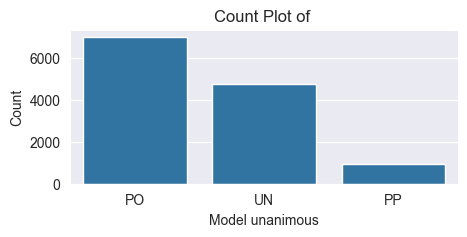

In [16]:
plt.figure(figsize=(5, 2))
sns.countplot(data=model_db, x='model_unanimous', order=model_db['model_unanimous'].value_counts().index)
plt.xlabel('Model unanimous')
plt.ylabel('Count')
plt.title('Count Plot of ')
plt.show()

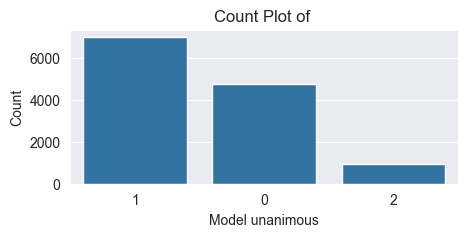

In [17]:
group_map = {'PO':1, 'UN': 0, 'PP': 2}
model_db['model_unanimous'] = model_db['model_unanimous'].map(group_map)
plt.figure(figsize=(5, 2))
sns.countplot(data=model_db, x='model_unanimous', order=model_db['model_unanimous'].value_counts().index)
plt.xlabel('Model unanimous')
plt.ylabel('Count')
plt.title('Count Plot of ')
plt.show()

In [18]:
correlation_with_target = model_db.select_dtypes(include=['int', 'float']).corr()['model_unanimous'].sort_values(ascending=False)

# Display correlation values
print(correlation_with_target.head(15))

model_unanimous    1.000000
emo_anx            0.426026
emo_neg            0.393955
tone_neg           0.353443
emotion            0.343179
Affect             0.255804
i                  0.230386
Dic                0.203789
auxverb            0.147690
focuspresent       0.142434
Linguistic         0.140516
verb               0.126296
function           0.120756
Authentic          0.118970
Apostro            0.101770
Name: model_unanimous, dtype: float64


In [19]:
neg_correlation_with_target = model_db.select_dtypes(include=['int', 'float']).corr()['model_unanimous'].sort_values(ascending=True)

# Display correlation values
print(neg_correlation_with_target.head(15))

Tone          -0.315546
Clout         -0.216906
Social        -0.182949
socrefs       -0.171557
polite        -0.164499
Physical      -0.153306
leisure       -0.137400
OtherP        -0.129325
you           -0.126049
BigWords      -0.121233
Analytic      -0.109224
shehe         -0.105455
AllPunc       -0.101171
socbehav      -0.100322
affiliation   -0.094889
Name: model_unanimous, dtype: float64


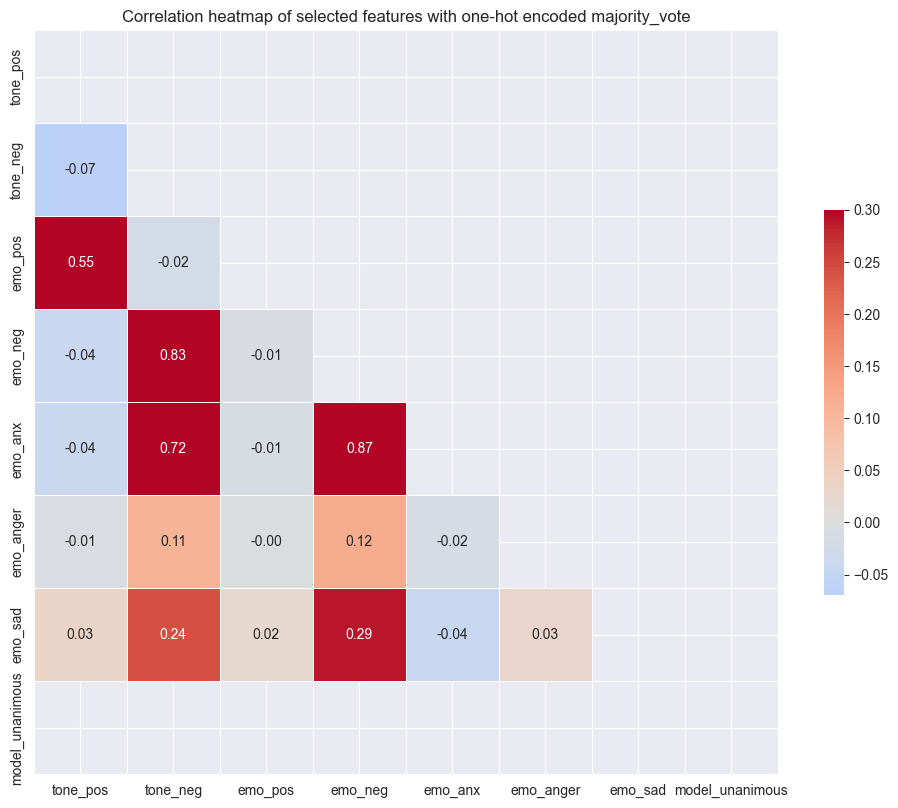

In [20]:
import numpy as np

columns = ['tone_pos', 'tone_neg', 'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad', 'model_unanimous']
group_map = {'PO':1, 'UN': 0, 'PP': 2}
model_db['model_unanimous'] = model_db['model_unanimous'].map(group_map)

corr = model_db[columns].corr()


mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(12, 10))


sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f", 
            cbar_kws={"shrink": .5})

plt.title('Correlation heatmap of selected features with one-hot encoded majority_vote')
plt.show()

<Axes: ylabel='count'>

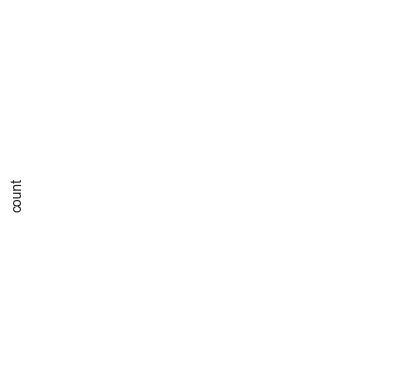

In [21]:
model_db.head(10)
group_map = {1: 'PO', 0: 'UN', 2: 'PP'}
model_db['model_unanimous'] = model_db['model_unanimous'].map(group_map)
model_db['model_unanimous'].value_counts().plot(kind='pie', autopct="%.1f%%")

In [22]:
columns_to_drop = ['text', 'proc_text', 'model_unanimous', 'Segment']
columns_exist = all(col in model_db.columns for col in columns_to_drop)
human_labels = model_db['model_unanimous']
if columns_exist:
    # Drop the specified columns
    model_db_drop = model_db.drop(columns=columns_to_drop)
    print(f"The columns {columns_to_drop} have been dropped.")
else:
    print(f"The columns {columns_to_drop} do not exist in the DataFrame.")
    
scaler = StandardScaler()
model_db_std = scaler.fit_transform(model_db_drop)

n_clusters = 3 

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5000, random_state=42)

kmeans.fit(model_db_std)
cluster_labels = kmeans.labels_

model_db['Predictions'] = cluster_labels

ari = adjusted_rand_score(human_labels, cluster_labels)

# Print the Adjusted Rand Index
print(f"Adjusted Rand Index: {ari}")



The columns ['text', 'proc_text', 'model_unanimous', 'Segment'] have been dropped.


ValueError: Input contains NaN